# 多层感知机

我们已经介绍了包括线性回归和softmax回归在内的单层神经网络。然而深度学习主要关注多层模型。在本节中，我们将以多层感知机（multilayer perceptron，MLP）为例，介绍多层神经网络的概念。

## 隐藏层

多层感知机在单层神经网络的基础上引入了一到多个隐藏层（hidden layer）。隐藏层位于输入层和输出层之间。图3.3展示了一个多层感知机的神经网络图。

![带有隐藏层的多层感知机。它含有一个隐藏层，该层中有5个隐藏单元](img/mlp.svg)

在图3.3所示的多层感知机中，输入和输出个数分别为4和3，中间的隐藏层中包含了5个隐藏单元（hidden unit）。由于输入层不涉及计算，图3.3中的多层感知机的层数为2。由图3.3可见，隐藏层中的神经元和输入层中各个输入完全连接，输出层中的神经元和隐藏层中的各个神经元也完全连接。因此，多层感知机中的隐藏层和输出层都是全连接层。


具体来说，给定一个小批量样本$\boldsymbol{X} \in \mathbb{R}^{n \times d}$，其批量大小为$n$，输入个数为$d$。假设多层感知机只有一个隐藏层，其中隐藏单元个数为$h$。记隐藏层的输出（也称为隐藏层变量或隐藏变量）为$\boldsymbol{H}$，有$\boldsymbol{H} \in \mathbb{R}^{n \times h}$。因为隐藏层和输出层均是全连接层，可以设隐藏层的权重参数和偏差参数分别为$\boldsymbol{W}_h \in \mathbb{R}^{d \times h}$和 $\boldsymbol{b}_h \in \mathbb{R}^{1 \times h}$，输出层的权重和偏差参数分别为$\boldsymbol{W}_o \in \mathbb{R}^{h \times q}$和$\boldsymbol{b}_o \in \mathbb{R}^{1 \times q}$。

我们先来看一种含单隐藏层的多层感知机的设计。其输出$\boldsymbol{O} \in \mathbb{R}^{n \times q}$的计算为

$$
\begin{aligned}
\boldsymbol{H} &= \boldsymbol{X} \boldsymbol{W}_h + \boldsymbol{b}_h,\\
\boldsymbol{O} &= \boldsymbol{H} \boldsymbol{W}_o + \boldsymbol{b}_o,
\end{aligned}      
$$

也就是将隐藏层的输出直接作为输出层的输入。如果将以上两个式子联立起来，可以得到

$$
\boldsymbol{O} = (\boldsymbol{X} \boldsymbol{W}_h + \boldsymbol{b}_h)\boldsymbol{W}_o + \boldsymbol{b}_o = \boldsymbol{X} \boldsymbol{W}_h\boldsymbol{W}_o + \boldsymbol{b}_h \boldsymbol{W}_o + \boldsymbol{b}_o.
$$

从联立后的式子可以看出，虽然神经网络引入了隐藏层，却依然等价于一个单层神经网络：其中输出层权重参数为$\boldsymbol{W}_h\boldsymbol{W}_o$，偏差参数为$\boldsymbol{b}_h \boldsymbol{W}_o + \boldsymbol{b}_o$。不难发现，即便再添加更多的隐藏层，以上设计依然只能与仅含输出层的单层神经网络等价。


## 激活函数

上述问题的根源在于全连接层只是对数据做仿射变换（affine transformation），而多个仿射变换的叠加仍然是一个仿射变换。解决问题的一个方法是引入非线性变换，例如对隐藏变量使用按元素运算的非线性函数进行变换，然后再作为下一个全连接层的输入。这个非线性函数被称为激活函数（activation function）。下面我们介绍几个常用的激活函数。

### ReLU函数

ReLU（rectified linear unit）函数提供了一个很简单的非线性变换。给定元素$x$，该函数定义为

$$\text{ReLU}(x) = \max(x, 0).$$

可以看出，ReLU函数只保留正数元素，并将负数元素清零。为了直观地观察这一非线性变换，我们先定义一个绘图函数`xyplot`。

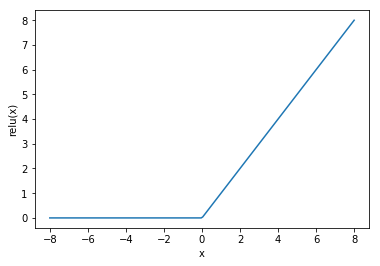

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def relu(x):
    return np.maximum(0, x)

x = np.linspace(-8,8,200)
plt.plot(x, relu(x))
plt.xlabel('x')
plt.ylabel('relu(x)')
plt.show()

#### ReLU求导
显然，当输入为负数时，ReLU函数的导数为0；当输入为正数时，ReLU函数的导数为1。尽管输入为0时ReLU函数不可导，但是我们可以取此处的导数为0。下面绘制ReLU函数的导数。

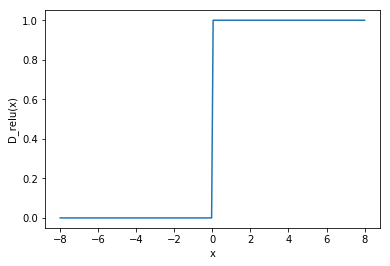

In [13]:
def D_relu(x):
    return np.where(x<0,0,1)

x = np.linspace(-8,8,200)
plt.plot(x, D_relu(x))
plt.xlabel('x')
plt.ylabel('D_relu(x)')
plt.show()

### sigmoid函数

sigmoid函数可以将元素的值变换到0和1之间：

$$\text{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$$

sigmoid函数在早期的神经网络中较为普遍，但它目前逐渐被更简单的ReLU函数取代。在后面“循环神经网络”一章中我们会介绍如何利用它值域在0到1之间这一特性来控制信息在神经网络中的流动。下面绘制了sigmoid函数。当输入接近0时，sigmoid函数接近线性变换。

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

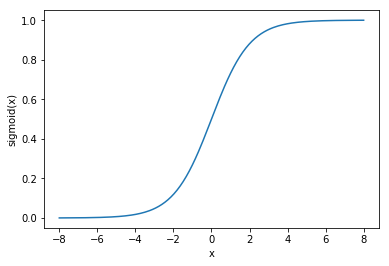

In [6]:
x = np.linspace(-8,8,200)
plt.plot(x, sigmoid(x))
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.show()

#### sigmoid导数
依据链式法则，sigmoid函数的导数

$$\text{sigmoid}'(x) = \text{sigmoid}(x)\left(1-\text{sigmoid}(x)\right).$$


下面绘制了sigmoid函数的导数。当输入为0时，sigmoid函数的导数达到最大值0.25；当输入越偏离0时，sigmoid函数的导数越接近0。

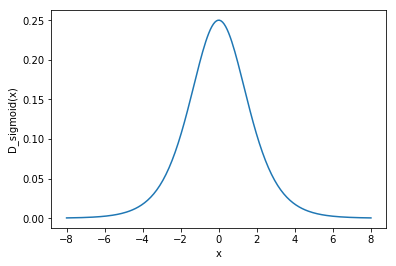

In [14]:
def D_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

x = np.linspace(-8,8,200)
plt.plot(x, D_sigmoid(x))
plt.xlabel('x')
plt.ylabel('D_sigmoid(x)')
plt.show()

### tanh函数

tanh（双曲正切）函数可以将元素的值变换到-1和1之间：

$$\text{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$$

我们接着绘制tanh函数。当输入接近0时，tanh函数接近线性变换。虽然该函数的形状和sigmoid函数的形状很像，但tanh函数在坐标系的原点上对称。

In [9]:
def tanh(x):
    return (1 - np.exp(-2*x))/ (1 + np.exp(-2*x))

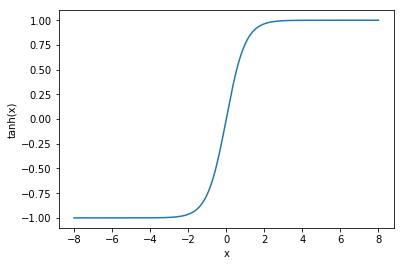

In [10]:
x = np.linspace(-8,8,200)
plt.plot(x, tanh(x))
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.show()

#### tanh的导数
依据链式法则，tanh函数的导数

$$\text{tanh}'(x) = 1 - \text{tanh}^2(x).$$

下面绘制了tanh函数的导数。当输入为0时，tanh函数的导数达到最大值1；当输入越偏离0时，tanh函数的导数越接近0。

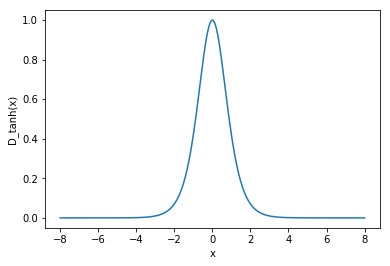

In [15]:
def D_tanh(x):
    return 1 - tanh(x)**2

x = np.linspace(-8,8,200)
plt.plot(x, D_tanh(x))
plt.xlabel('x')
plt.ylabel('D_tanh(x)')
plt.show()

## 多层感知机

多层感知机就是含有至少一个隐藏层的由全连接层组成的神经网络，且每个隐藏层的输出通过激活函数进行变换。多层感知机的层数和各隐藏层中隐藏单元个数都是超参数。以单隐藏层为例并沿用本节之前定义的符号，多层感知机按以下方式计算输出：

$$
\begin{aligned}
\boldsymbol{H} &= \phi(\boldsymbol{X} \boldsymbol{W}_h + \boldsymbol{b}_h),\\
\boldsymbol{O} &= \boldsymbol{H} \boldsymbol{W}_o + \boldsymbol{b}_o,
\end{aligned}
$$
 
其中$\phi$表示激活函数。在分类问题中，我们可以对输出$\boldsymbol{O}$做softmax运算，并使用softmax回归中的交叉熵损失函数。
在回归问题中，我们将输出层的输出个数设为1，并将输出$\boldsymbol{O}$直接提供给线性回归中使用的平方损失函数。



## 小结

* 多层感知机在输出层与输入层之间加入了一个或多个全连接隐藏层，并通过激活函数对隐藏层输出进行变换。
* 常用的激活函数包括ReLU函数、sigmoid函数和tanh函数。